In [20]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  


# merging two csv files
#flights = pd.concat(
#    map(pd.read_csv, ["../BITS PILANI FINAL PROJECT/2007.csv", "../BITS PILANI FINAL PROJECT/2008.csv"]), ignore_index=True)

df=pd.read_csv("../BITS PILANI FINAL PROJECT/2007.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,NaN,0,0,0,0,0,0
7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,NaN,0,0,0,0,0,0
7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,NaN,0,0,0,15,0,0
7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,NaN,0,0,0,0,0,36


In [21]:
#flights_needed_data = flights[0:100000]  # getting a segment 
#flights_needed_data = flights
#flights_needed_data.info()  # for an insight into the data
#df=df[0:100000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [22]:
# filtering out unnecessary columns
#flights_needed_data=flights_needed_data.drop(['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','FlightNum','TailNum',
#                                              'FlightNum','Distance','TaxiOut','TaxiIn',
#                                              'CRSArrTime','CRSDepTime','CancellationCode'], axis=1)

#flights_needed_data


df=df.drop(['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','FlightNum','TailNum',
                                              'FlightNum','Distance','TaxiOut','TaxiIn',
                                              'CRSArrTime','CRSDepTime','CancellationCode'], axis=1)

df

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,1232.0,1341.0,WN,69.0,54.0,1.0,7.0,SMF,ONT,0,0,0,0,0,0,0
1,1,1918.0,2043.0,WN,85.0,74.0,8.0,13.0,SMF,PDX,0,0,0,0,0,0,0
2,1,2206.0,2334.0,WN,88.0,73.0,34.0,36.0,SMF,PDX,0,0,3,0,0,0,31
3,1,1230.0,1356.0,WN,86.0,75.0,26.0,30.0,SMF,PDX,0,0,23,0,0,0,3
4,1,831.0,957.0,WN,86.0,74.0,-3.0,1.0,SMF,PDX,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,6,1558.0,1749.0,DL,111.0,80.0,13.0,-7.0,MCO,ATL,0,0,0,0,0,0,0
7453211,6,1902.0,2110.0,DL,248.0,221.0,5.0,11.0,ATL,SLC,0,0,0,0,0,0,0
7453212,6,1024.0,1750.0,DL,266.0,233.0,15.0,-1.0,LAX,ATL,0,0,0,0,15,0,0
7453213,6,1353.0,1658.0,DL,125.0,100.0,36.0,38.0,DFW,ATL,0,0,0,0,0,0,36


In [ ]:
# replacing all NaN values with the mean of the attribute in which they are present
#flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

df=df.fillna(df.mean())

In [ ]:
df['Status'] = np.where(df['ArrDelay'] <= 15, 0,1)

In [5]:
#df =flights_needed_data
    
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 1
    df.loc[df['Diverted'] == 1, 'Status'] = 1
    df.loc[df['Cancelled'] == 1, 'Status'] = 1

    # replacing na values in college with No college
df["LateAircraftDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["CarrierDelay"].fillna(0, inplace = True)
#print("Y variable in two categories")

In [ ]:
df

In [7]:
# removing some more columns
df=df.drop(['Origin', 'Dest', 'UniqueCarrier'],axis=1)
df


,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
0,1,1232.0,1341.0,69.0,54.0,1.0,7.0,0,0,0,0,0,0,0,0.0
1,1,1918.0,2043.0,85.0,74.0,8.0,13.0,0,0,0,0,0,0,0,0.0
2,1,2206.0,2334.0,88.0,73.0,34.0,36.0,0,0,3,0,0,0,31,1.0
3,1,1230.0,1356.0,86.0,75.0,26.0,30.0,0,0,23,0,0,0,3,1.0
4,1,831.0,957.0,86.0,74.0,-3.0,1.0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,1558.0,1812.0,134.0,100.0,15.0,23.0,0,0,2,0,0,0,13,1.0
99996,2,1610.0,1819.0,129.0,101.0,7.0,0.0,0,0,0,0,0,0,0,0.0
99997,5,1626.0,1838.0,132.0,112.0,-9.0,-4.0,0,0,0,0,0,0,0,0.0
99998,1,1245.0,1427.0,162.0,133.0,-9.0,5.0,0,0,0,0,0,0,0,0.0


In [8]:
df["Status"]=df["Status"].astype("category")
data = df.values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   DayOfWeek          100000 non-null  int64   
 1   DepTime            100000 non-null  float64 
 2   ArrTime            100000 non-null  float64 
 3   ActualElapsedTime  100000 non-null  float64 
 4   AirTime            100000 non-null  float64 
 5   ArrDelay           100000 non-null  float64 
 6   DepDelay           100000 non-null  float64 
 7   Cancelled          100000 non-null  int64   
 8   Diverted           100000 non-null  int64   
 9   CarrierDelay       100000 non-null  int64   
 10  WeatherDelay       100000 non-null  int64   
 11  NASDelay           100000 non-null  int64   
 12  SecurityDelay      100000 non-null  int64   
 13  LateAircraftDelay  100000 non-null  int64   
 14  Status             100000 non-null  category
dtypes: category(1), float64(6), int64(8

In [10]:
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_test)


[[ 0.62216075  1.07760137  0.87666822 ...  2.27068769 -0.02305986
  -0.25002705]
 [ 1.13411887  1.2963987   1.23627523 ... -0.16655227 -0.02305986
  -0.25002705]
 [-1.4256717  -1.65736516 -1.67799659 ... -0.16655227 -0.02305986
  -0.25002705]
 ...
 [-0.91371359  1.2963987   1.25290446 ... -0.16655227 -0.02305986
  -0.25002705]
 [-1.4256717  -0.98784535 -1.04400736 ... -0.16655227 -0.02305986
  -0.25002705]
 [ 0.62216075  1.91121917  1.51273611 ... -0.16655227 -0.02305986
   0.88440615]]


Minimum error:- 3.3333333333333335e-05 at K = 3


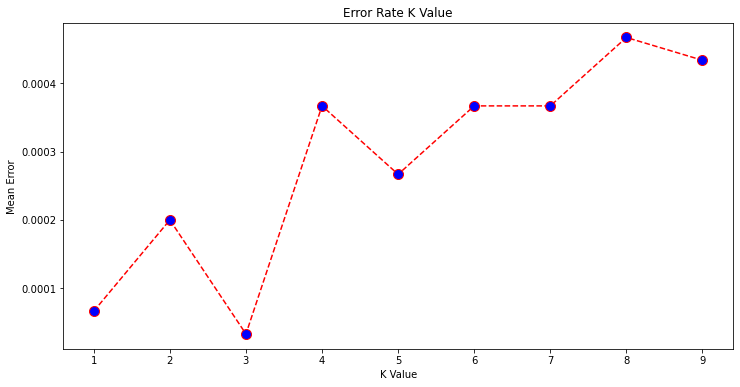

In [13]:
error = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Minimum error:- 0.0004333333333333333 at K = 1


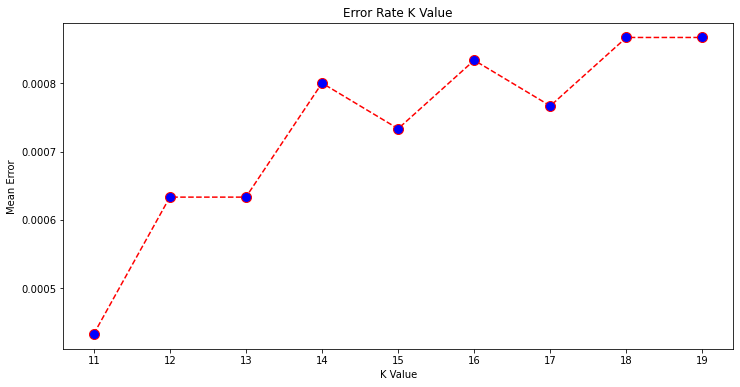

In [14]:
error = []
# Calculating error for K values between 1 and 30
for i in range(11, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(11, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Minimum error:- 0.0009666666666666667 at K = 1


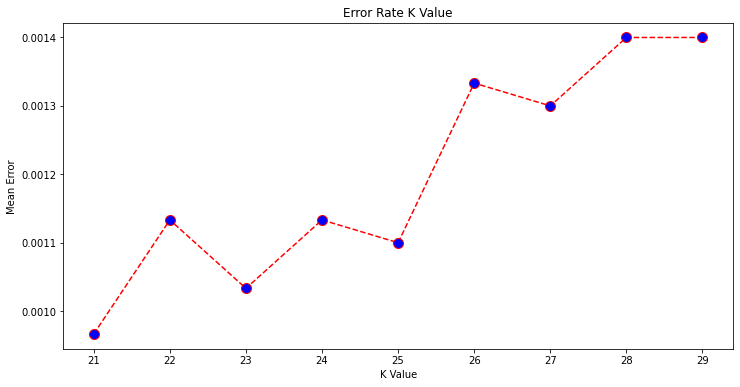

In [15]:
error = []
# Calculating error for K values between 1 and 30
for i in range(21, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(21, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [16]:
classifier= KNeighborsClassifier(n_neighbors=11)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [17]:
ac=accuracy_score(y_test, y_pred)

In [18]:
cm

array([[24582,     0],
       [   13,  5405]], dtype=int64)

In [19]:
ac

0.9995666666666667